In [3]:
!git clone https://github.com/jlm429/pyperch

Cloning into 'pyperch'...



In [7]:
!pip install skorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 20.1 MB/s eta 0:00:00


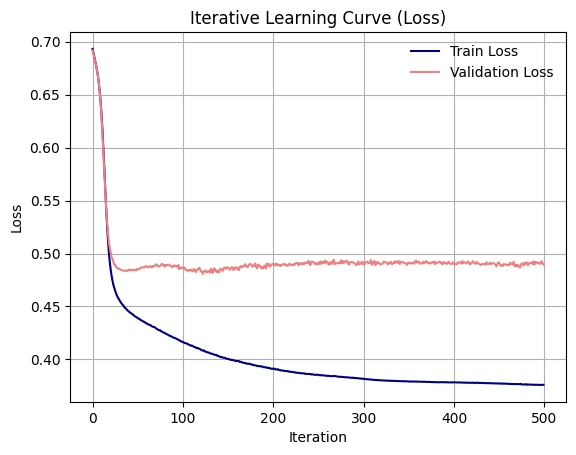

In [19]:
import numpy as np
import pandas as pd
from torch import nn, optim
from skorch import NeuralNetClassifier
from pyperch.pyperch.neural.backprop_nn import BackpropModule 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from skorch.callbacks import EpochScoring 

# Load the dataset
heart_data = pd.read_csv('heart.csv')

# Preprocess the data
# Convert categorical columns to numerical
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col, le in label_encoders.items():
    heart_data[col] = le.fit_transform(heart_data[col])

# Separate features and target
X = heart_data.drop('HeartDisease', axis=1).values
y = heart_data['HeartDisease'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to appropriate dtype
X = X.astype(np.float32)
y = y.astype(np.int64)

# Define the neural network
net = NeuralNetClassifier(
    module=BackpropModule,
    module__input_dim=X.shape[1],
    module__output_dim=2,
    module__hidden_units=100,
    module__hidden_layers=2,
    max_epochs=500,
    verbose=0,
    callbacks=[EpochScoring(scoring='accuracy', name='train_acc', on_train=True),],
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.SGD,
    lr=0.1,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)

# Train the neural network
net.fit(X, y)

# Plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)
plt.show()


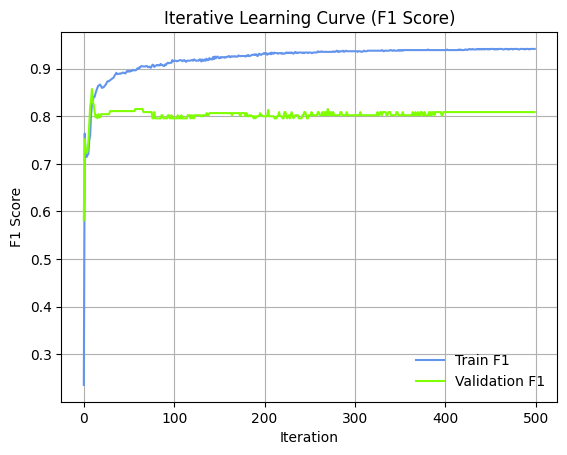

In [21]:
import numpy as np
import pandas as pd
from torch import nn, optim
from skorch import NeuralNetClassifier
from pyperch.pyperch.neural.backprop_nn import BackpropModule 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from skorch.callbacks import EpochScoring
from sklearn.metrics import f1_score

# Load the dataset
heart_data = pd.read_csv('heart.csv')

# Preprocess the data
# Convert categorical columns to numerical
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col, le in label_encoders.items():
    heart_data[col] = le.fit_transform(heart_data[col])

# Separate features and target
X = heart_data.drop('HeartDisease', axis=1).values
y = heart_data['HeartDisease'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to appropriate dtype
X = X.astype(np.float32)
y = y.astype(np.int64)

# Define the neural network
net = NeuralNetClassifier(
    module=BackpropModule,
    module__input_dim=X.shape[1],
    module__output_dim=2,
    module__hidden_units=100,
    module__hidden_layers=2,
    max_epochs=500,
    verbose=0,
    callbacks=[EpochScoring(scoring='f1', name='train_f1', on_train=True),
               EpochScoring(scoring='f1', name='valid_f1', on_train=False)],
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.SGD,
    lr=0.1,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)

# Train the neural network
net.fit(X, y)

# Plot the iterative learning curve (F1 score)
plt.plot(net.history[:, 'train_f1'], label='Train F1', color='cornflowerblue')
plt.plot(net.history[:, 'valid_f1'], label='Validation F1', color='chartreuse')
plt.xlabel("Iteration")
plt.ylabel("F1 Score")
plt.title("Iterative Learning Curve (F1 Score)")
plt.grid(visible=True)
plt.legend(frameon=False)
plt.show()


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


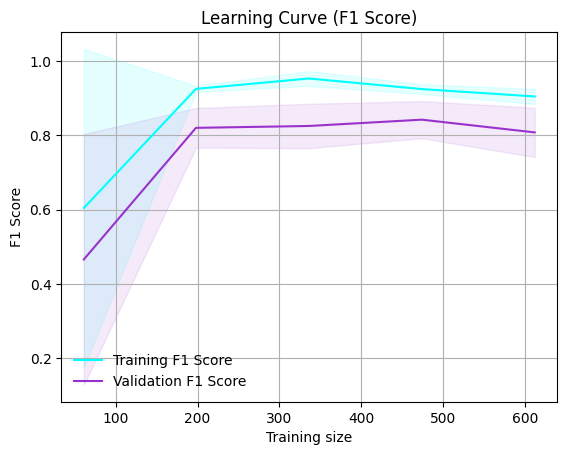

In [22]:
import numpy as np
import pandas as pd
from torch import nn, optim
from skorch import NeuralNetClassifier
from pyperch.pyperch.neural.backprop_nn import BackpropModule 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from skorch.callbacks import EpochScoring
from sklearn.metrics import make_scorer, f1_score

# Load the dataset
heart_data = pd.read_csv('heart.csv')

# Preprocess the data
# Convert categorical columns to numerical
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col, le in label_encoders.items():
    heart_data[col] = le.fit_transform(heart_data[col])

# Separate features and target
X = heart_data.drop('HeartDisease', axis=1).values
y = heart_data['HeartDisease'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to appropriate dtype
X = X.astype(np.float32)
y = y.astype(np.int64)

# Define the neural network
net = NeuralNetClassifier(
    module=BackpropModule,
    module__input_dim=X.shape[1],
    module__output_dim=2,
    module__hidden_units=30,
    module__hidden_layers=1,
    max_epochs=500,
    verbose=0,
    callbacks=[EpochScoring(scoring='f1', name='train_f1', on_train=True),
               EpochScoring(scoring='f1', name='valid_f1', on_train=False)],
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.SGD,
    lr=.05,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)

# Train the neural network
net.fit(X, y)

# Plot the learning curve
f1_scorer = make_scorer(f1_score, average='binary')

train_sizes, train_scores, test_scores = learning_curve(
    net, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring=f1_scorer
)

train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='cyan')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='darkorchid')
plt.plot(train_sizes, train_scores_mean, label="Training F1 Score", color='cyan')
plt.plot(train_sizes, test_scores_mean, label="Validation F1 Score", color='darkorchid')
plt.title("Learning Curve (F1 Score)")
plt.xlabel("Training size")
plt.ylabel("F1 Score")
plt.grid(visible=True)
plt.legend(frameon=False)
plt.show()


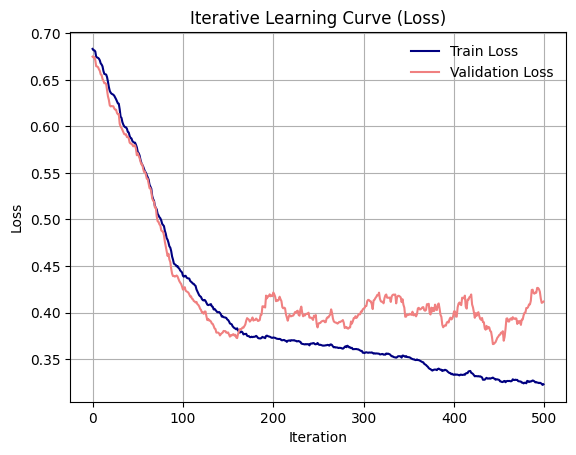

In [7]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from skorch import NeuralNetClassifier
from pyperch.pyperch.neural.sa_nn import SAModule  
from skorch.callbacks import EpochScoring 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, make_scorer

# Load the dataset
heart_data = pd.read_csv('heart.csv')

# Preprocess the data
# Convert categorical columns to numerical
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col, le in label_encoders.items():
    heart_data[col] = le.fit_transform(heart_data[col])

# Separate features and target
X = heart_data.drop('HeartDisease', axis=1).values
y = heart_data['HeartDisease'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to appropriate dtype
X = X.astype(np.float32)
y = y.astype(np.int64)

# Check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define the neural network with SA
net = NeuralNetClassifier(
    module=SAModule,
    module__input_dim=X.shape[1],
    module__output_dim=2,
    module__hidden_units=20,
    module__hidden_layers=1,
    module__step_size=.1,
    module__t=500,
    module__cooling=.1,
    max_epochs=500,
    verbose=0,
    callbacks=[
        EpochScoring(scoring=make_scorer(f1_score, average='binary'), name='train_f1', on_train=True),
        EpochScoring(scoring=make_scorer(f1_score, average='binary'), name='valid_f1', on_train=False)
    ],
    iterator_train__shuffle=True,
    iterator_train__num_workers=4,  # Utilize multiple CPUs
    iterator_valid__num_workers=4,  # Utilize multiple CPUs
    device=device
)

# Register SA training step
SAModule.register_sa_training_step()

# Fit the data
net.fit(X, y)

# Plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)
plt.show()



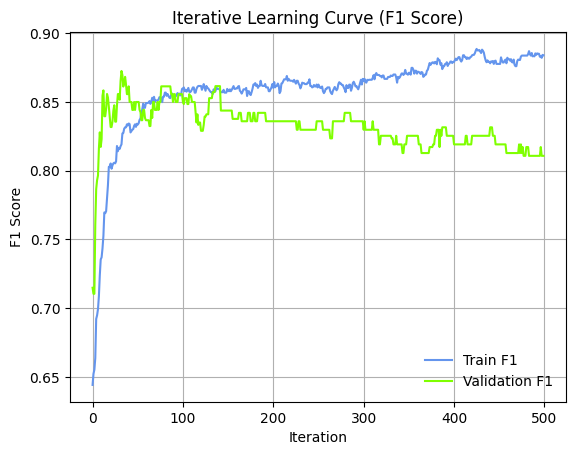

In [8]:
# Plot the iterative learning curve (F1 score)
plt.plot(net.history[:, 'train_f1'], label='Train F1', color='cornflowerblue')
plt.plot(net.history[:, 'valid_f1'], label='Validation F1', color='chartreuse')
plt.xlabel("Iteration")
plt.ylabel("F1 Score")
plt.title("Iterative Learning Curve (F1 Score)")
plt.grid(visible=True)
plt.legend(frameon=False)
plt.show()

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fb49da77c70>
Traceback (most recent call last):
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1437, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


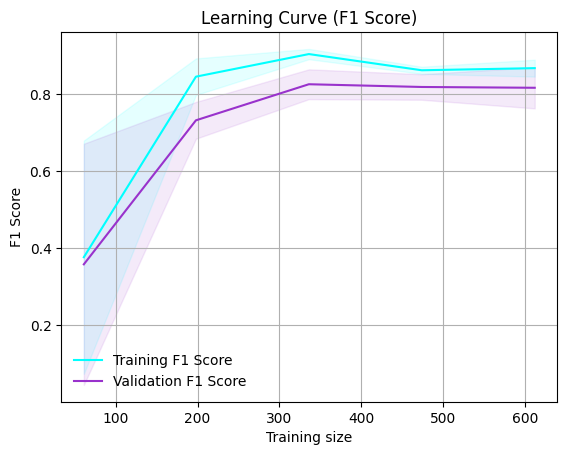

In [11]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from skorch import NeuralNetClassifier
from pyperch.pyperch.neural.sa_nn import SAModule  
from skorch.callbacks import EpochScoring 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import learning_curve

# Load the dataset
heart_data = pd.read_csv('heart.csv')

# Preprocess the data
# Convert categorical columns to numerical
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col, le in label_encoders.items():
    heart_data[col] = le.fit_transform(heart_data[col])

# Separate features and target
X = heart_data.drop('HeartDisease', axis=1).values
y = heart_data['HeartDisease'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to appropriate dtype
X = X.astype(np.float32)
y = y.astype(np.int64)

# Check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define the neural network with SA
net = NeuralNetClassifier(
    module=SAModule,
    module__input_dim=X.shape[1],
    module__output_dim=2,
    module__hidden_units=20,
    module__hidden_layers=1,
    module__step_size=.1,
    module__t=500,
    module__cooling=.1,
    max_epochs=500,
    verbose=0,
    callbacks=[
        EpochScoring(scoring=make_scorer(f1_score, average='binary'), name='train_f1', on_train=True),
        EpochScoring(scoring=make_scorer(f1_score, average='binary'), name='valid_f1', on_train=False)
    ],
    iterator_train__shuffle=True,
    iterator_train__num_workers=64,  # Utilize multiple CPUs
    iterator_valid__num_workers=64,  # Utilize multiple CPUs
    device=device
)

# Register SA training step
SAModule.register_sa_training_step()

# Fit the data
net.fit(X, y)


# Plot the learning curve using sklearn's learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    net, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring=make_scorer(f1_score, average='binary')
)

train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='cyan')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='darkorchid')

plt.plot(train_sizes, train_scores_mean, label="Training F1 Score", color='cyan')
plt.plot(train_sizes, test_scores_mean, label="Validation F1 Score", color='darkorchid')
plt.title("Learning Curve (F1 Score)")
plt.xlabel("Training size")
plt.ylabel("F1 Score")
plt.grid(visible=True)
plt.legend(frameon=False)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from skorch import NeuralNetClassifier
from pyperch.pyperch.neural.rhc_nn import RHCModule  
from skorch.callbacks import EpochScoring 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import learning_curve

# Load the dataset
heart_data = pd.read_csv('heart.csv')

# Preprocess the data
# Convert categorical columns to numerical
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col, le in label_encoders.items():
    heart_data[col] = le.fit_transform(heart_data[col])

# Separate features and target
X = heart_data.drop('HeartDisease', axis=1).values
y = heart_data['HeartDisease'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to appropriate dtype
X = X.astype(np.float32)
y = y.astype(np.int64)

# Check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define the neural network with RHC
net = NeuralNetClassifier(
    module=RHCModule,
    module__input_dim=X.shape[1],
    module__output_dim=2,
    module__hidden_units=50,
    module__hidden_layers=1,
    module__step_size=.05,
    max_epochs=2000,
    verbose=0,
    callbacks=[
        EpochScoring(scoring=make_scorer(f1_score, average='binary'), name='train_f1', on_train=True),
        EpochScoring(scoring=make_scorer(f1_score, average='binary'), name='valid_f1', on_train=False)
    ],
    iterator_train__shuffle=True,
    iterator_train__num_workers=4,  # Utilize multiple CPUs
    iterator_valid__num_workers=4,  # Utilize multiple CPUs
    device=device
)

# Register RHC training step
RHCModule.register_rhc_training_step()

# Fit the data
net.fit(X, y)

# Plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)
plt.show()

# Plot the iterative learning curve (F1 score)
plt.plot(net.history[:, 'train_f1'], label='Train F1', color='cornflowerblue')
plt.plot(net.history[:, 'valid_f1'], label='Validation F1', color='chartreuse')
plt.xlabel("Iteration")
plt.ylabel("F1 Score")
plt.title("Iterative Learning Curve (F1 Score)")
plt.grid(visible=True)
plt.legend(frameon=False)
plt.show()

# Plot the learning curve using sklearn's learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    net, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring=make_scorer(f1_score, average='binary')
)

train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='cyan')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='darkorchid')

plt.plot(train_sizes, train_scores_mean, label="Training F1 Score", color='cyan')
plt.plot(train_sizes, test_scores_mean, label="Validation F1 Score", color='darkorchid')
plt.title("Learning Curve (F1 Score)")
plt.xlabel("Training size")
plt.ylabel("F1 Score")
plt.grid(visible=True)
plt.legend(frameon=False)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from skorch import NeuralNetClassifier
from pyperch.pyperch.neural.rhc_nn import RHCModule  
from skorch.callbacks import EpochScoring 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import learning_curve

# Load the dataset
heart_data = pd.read_csv('heart.csv')

# Preprocess the data
# Convert categorical columns to numerical
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col, le in label_encoders.items():
    heart_data[col] = le.fit_transform(heart_data[col])

# Separate features and target
X = heart_data.drop('HeartDisease', axis=1).values
y = heart_data['HeartDisease'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to appropriate dtype
X = X.astype(np.float32)
y = y.astype(np.int64)

# Check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define the neural network with RHC
net = NeuralNetClassifier(
    module=RHCModule,
    module__input_dim=X.shape[1],
    module__output_dim=2,
    module__hidden_units=50,
    module__hidden_layers=1,
    module__step_size=.05,
    max_epochs=2000,
    verbose=0,
    callbacks=[
        EpochScoring(scoring=make_scorer(f1_score, average='binary'), name='train_f1', on_train=True),
        EpochScoring(scoring=make_scorer(f1_score, average='binary'), name='valid_f1', on_train=False)
    ],
    iterator_train__shuffle=True,
    iterator_train__num_workers=4,  # Utilize multiple CPUs
    iterator_valid__num_workers=4,  # Utilize multiple CPUs
    device=device
)

# Register RHC training step
RHCModule.register_rhc_training_step()

# Fit the data
net.fit(X, y)

# Plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)
plt.show()

# Plot the iterative learning curve (F1 score)
plt.plot(net.history[:, 'train_f1'], label='Train F1', color='cornflowerblue')
plt.plot(net.history[:, 'valid_f1'], label='Validation F1', color='chartreuse')
plt.xlabel("Iteration")
plt.ylabel("F1 Score")
plt.title("Iterative Learning Curve (F1 Score)")
plt.grid(visible=True)
plt.legend(frameon=False)
plt.show()

# Plot the learning curve using sklearn's learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    net, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring=make_scorer(f1_score, average='binary')
)

train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='cyan')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='darkorchid')

plt.plot(train_sizes, train_scores_mean, label="Training F1 Score", color='cyan')
plt.plot(train_sizes, test_scores_mean, label="Validation F1 Score", color='darkorchid')
plt.title("Learning Curve (F1 Score)")
plt.xlabel("Training size")
plt.ylabel("F1 Score")
plt.grid(visible=True)
plt.legend(frameon=False)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from skorch import NeuralNetClassifier
from pyperch.pyperch.neural.ga_nn import GAModule  
from skorch.callbacks import EpochScoring 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import learning_curve

print("Loading the dataset...")
# Load the dataset
heart_data = pd.read_csv('heart.csv')

print("Preprocessing the data...")
# Preprocess the data
# Convert categorical columns to numerical
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col, le in label_encoders.items():
    heart_data[col] = le.fit_transform(heart_data[col])

# Separate features and target
X = heart_data.drop('HeartDisease', axis=1).values
y = heart_data['HeartDisease'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to appropriate dtype
X = X.astype(np.float32)
y = y.astype(np.int64)

# Check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

print("Defining the neural network with GA...")
# Define the neural network with GA
net = NeuralNetClassifier(
    module=GAModule,
    module__input_dim=X.shape[1],
    module__output_dim=2,
    module__hidden_units=50,
    module__hidden_layers=1,
    module__population_size=300,
    module__to_mate=150,
    module__to_mutate=30,
    max_epochs=200,
    verbose=0,
    callbacks=[
        EpochScoring(scoring=make_scorer(f1_score, average='binary'), name='train_f1', on_train=True),
        EpochScoring(scoring=make_scorer(f1_score, average='binary'), name='valid_f1', on_train=False)
    ],
    criterion=nn.CrossEntropyLoss(),
    iterator_train__shuffle=True,
    iterator_train__num_workers=64,  # Utilize multiple CPUs
    iterator_valid__num_workers=64,  # Utilize multiple CPUs
    device=device
)

# Register GA training step
GAModule.register_ga_training_step()

print("Fitting the data...")
# Fit the data
net.fit(X, y)

print("Plotting the iterative learning curve (loss)...")
# Plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)
plt.show()

print("Plotting the iterative learning curve (F1 score)...")
# Plot the iterative learning curve (F1 score)
plt.plot(net.history[:, 'train_f1'], label='Train F1', color='cornflowerblue')
plt.plot(net.history[:, 'valid_f1'], label='Validation F1', color='chartreuse')
plt.xlabel("Iteration")
plt.ylabel("F1 Score")
plt.title("Iterative Learning Curve (F1 Score)")
plt.grid(visible=True)
plt.legend(frameon=False)
plt.show()


In [3]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.1 MB/s eta 0:00:00
